In [1]:
!pip install pandas scikit-learn matplotlib seaborn pgmpy scapy faker #installs Python libraries using pip (Python’s package manager).
#pandas: For data manipulation and analysis.
#matplotlib: For creating visualizations like graphs and charts.
!apt-get install libpcap-dev -y

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/

In [2]:
!wget https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain%2B.csv -O nsl_kdd.csv

--2025-04-23 14:46:29--  https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain%2B.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14612857 (14M) [text/plain]
Saving to: ‘nsl_kdd.csv’

nsl_kdd.csv         100%[===================>]  13.94M  --.-KB/s    in 0.1s    

2025-04-23 14:46:31 (147 MB/s) - ‘nsl_kdd.csv’ saved [14612857/14612857]



In [3]:
from google.colab import drive
drive.mount('/content/drive')

# Load NSL-KDD (or your lab dataset)
import pandas as pd
df = pd.read_csv("/content/nsl_kdd.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import matplotlib.pyplot as plt
def preprocess_data(df):
    """
    Universal preprocessing for cybersecurity datasets.
    Handles: NSL-KDD, CIC-IDS
    """
    # 1. Auto-detect target column (common labels: 'class', 'label', 'attack')
    target_col = None
    for col in ['class', 'label', 'attack', 'target']:
        if col in df.columns:
            target_col = col
            break

    if target_col is None:
        # If no target column found, use last column (common in lab datasets)
        target_col = df.columns[-1]
        print(f"Warning: Using last column '{target_col}' as target")

    # 2. Encode categorical features (auto-detect)
    cat_cols = [col for col in df.columns if df[col].dtype == 'object' and col != target_col]
    for col in cat_cols:
        df[col] = LabelEncoder().fit_transform(df[col])

    # 3. Set binary target (1=attack, 0=normal)
    # Handle varied label formats (e.g., "normal"/"attack", 0/1, True/False)
    if df[target_col].dtype == 'object':
        df['target'] = df[target_col].apply(lambda x: 0 if 'normal' in str(x).lower() else 1)
    else:
        df['target'] = df[target_col]  # Assume already binary

    # 4. Normalize numerical features
    scaler = StandardScaler()
    X = scaler.fit_transform(df.drop(columns=['target', target_col], errors='ignore'))
    y = df['target']

    print(f"Preprocessed data shape: {X.shape}")
    print(f"Attack rate: {y.mean():.2%}")
    return X, y

# Usage
X, y = preprocess_data(df)

Preprocessed data shape: (125972, 42)
Attack rate: 1950.41%


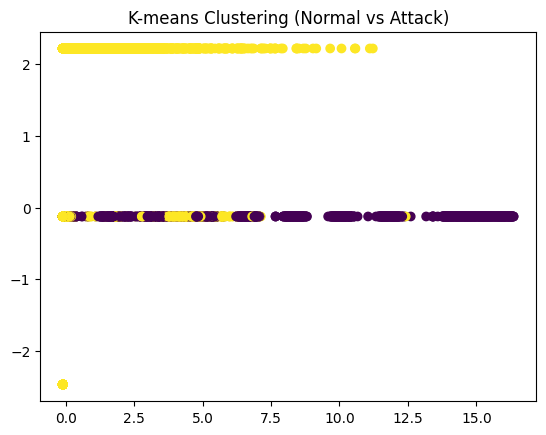

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.title("K-means Clustering (Normal vs Attack)")
plt.show()

Data loaded successfully. Shape: (125972, 43)
Using '20' as target column
Sampled 5000 records for clustering
Final shape: (5000, 42), Attack rate: 100.00%

Starting HAC (this may take several minutes)...


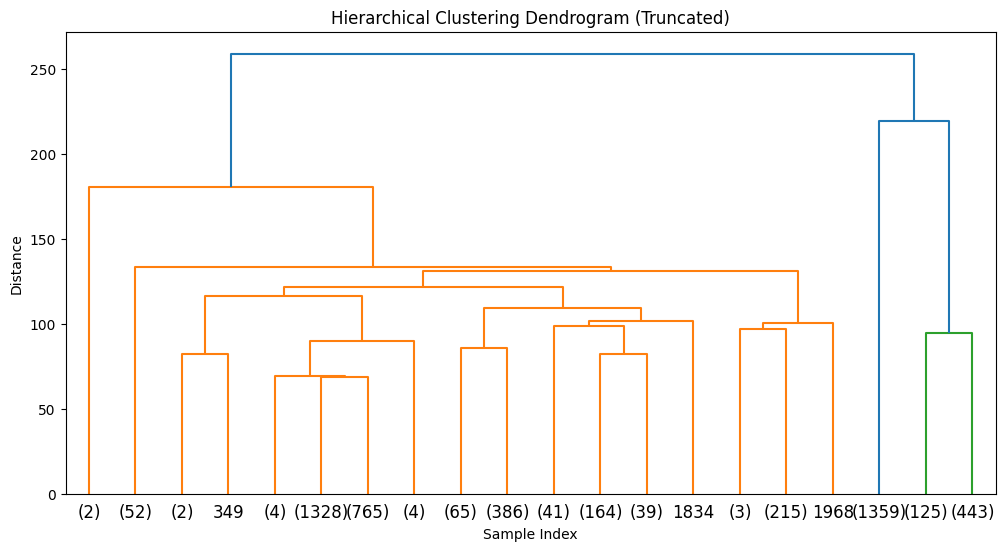

HAC completed successfully!


In [6]:
# 1. First run ALL IMPORTS
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# 2. Load your dataset (replace path)
try:
    df = pd.read_csv("/content/nsl_kdd.csv")
    print("Data loaded successfully. Shape:", df.shape)
except Exception as e:
    print("Error loading file:", e)
    raise

# 3. Robust Preprocessing
def preprocess_data(df, sample_size=5000):
    """Safe preprocessing with sampling for large datasets"""
    # Handle missing values
    df = df.dropna(axis=1, how='all')  # Drop completely empty columns
    df = df.fillna(0)  # Fill remaining NAs with 0

    # Auto-detect target
    target_col = next((col for col in ['class', 'label', 'attack', 'target']
                      if col in df.columns), df.columns[-1])
    print(f"Using '{target_col}' as target column")

    # Sample data if too large for HAC
    if len(df) > sample_size:
        df = df.sample(sample_size, random_state=42)
        print(f"Sampled {sample_size} records for clustering")

    # Encode categorical
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        if col != target_col:
            df[col] = LabelEncoder().fit_transform(df[col].astype(str))

    # Create target
    y = np.where(df[target_col].astype(str).str.contains('normal', case=False), 0, 1)

    # Normalize features
    features = df.drop(columns=[target_col], errors='ignore')
    X = StandardScaler().fit_transform(features.select_dtypes(include=np.number))

    print(f"Final shape: {X.shape}, Attack rate: {y.mean():.2%}")
    return X, y

# 4. Run preprocessing
X, y = preprocess_data(df)

# 5. Optimized HAC
try:
    print("\nStarting HAC (this may take several minutes)...")
    linked = linkage(X, method='ward', metric='euclidean', optimal_ordering=True)

    plt.figure(figsize=(12, 6))
    dendrogram(linked, orientation='top', truncate_mode='lastp', p=20)
    plt.title("Hierarchical Clustering Dendrogram (Truncated)")
    plt.xlabel("Sample Index")
    plt.ylabel("Distance")
    plt.show()
    print("HAC completed successfully!")
except Exception as e:
    print("HAC failed:", e)
    print("\nTry reducing sample_size in preprocess_data() or using K-means instead")

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate
from sklearn.metrics import classification_report
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1500

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [8]:
# 1. First ensure pgmpy is installed (run this if you haven't)
!pip install pgmpy

# 2. Fixed Bayesian Network Implementation
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

def build_bayesian_network():
    """Creates and tests a Bayesian Network for intrusion detection"""
    try:
        # Define network structure
        model = DiscreteBayesianNetwork([('NI', 'HT'), ('NI', 'FL'), ('NI', 'UD')])

        # Define Conditional Probability Distributions
        cpd_ni = TabularCPD(
            variable='NI',
            variable_card=2,
            values=[[0.9], [0.1]],  # P(NI=False)=90%, P(NI=True)=10%
            state_names={'NI': ['False', 'True']}
        )

        cpd_ht = TabularCPD(
            variable='HT',
            variable_card=2,
            values=[[0.8, 0.3],  # P(HT=False|NI=False), P(HT=False|NI=True)
                   [0.2, 0.7]],  # P(HT=True|NI=False), P(HT=True|NI=True)
            evidence=['NI'],
            evidence_card=[2],
            state_names={'HT': ['False', 'True'], 'NI': ['False', 'True']}
        )

        # Add more CPDs for FL and UD similarly...
        cpd_fl = TabularCPD(
            variable='FL',
            variable_card=2,
            values=[[0.95, 0.2],  # P(FL=False|NI=False), P(FL=False|NI=True)
                   [0.05, 0.8]],  # P(FL=True|NI=False), P(FL=True|NI=True)
            evidence=['NI'],
            evidence_card=[2],
            state_names={'FL': ['False', 'True'], 'NI': ['False', 'True']}
        )
        cpd_ud = TabularCPD(
            variable='UD',
            variable_card=2,
            values=[[0.98, 0.1],  # P(UD=False|NI=False), P(UD=False|NI=True)
                   [0.02, 0.9]],  # P(UD=True|NI=False), P(UD=True|NI=True)
            evidence=['NI'],
            evidence_card=[2],
            state_names={'UD': ['False', 'True'], 'NI': ['False', 'True']}
        )
        # Add CPDs to model
        model.add_cpds(cpd_ni, cpd_ht, cpd_fl, cpd_ud)


        # Verify model
        if not model.check_model():
            raise ValueError("Invalid Bayesian Network structure")

        print("Bayesian Network created successfully!")
        return model

    except Exception as e:
        print("Error building network:", e)
        return None

# 3. Build and test the network
bn_model = build_bayesian_network()

if bn_model:
    # Perform inference
    infer = VariableElimination(bn_model)
    result = infer.query(variables=['NI'], evidence={'HT': 'True'})
    print("\nInference result when HT=True:")
    print(result)

Bayesian Network created successfully!

Inference result when HT=True:
+-----------+-----------+
| NI        |   phi(NI) |
+===========+===========+
| NI(False) |    0.7200 |
+-----------+-----------+
| NI(True)  |    0.2800 |
+-----------+-----------+


In [9]:
# ---------------------------------------------
# 1. IMPORTS
# ---------------------------------------------
#Scapy + Faker: Simulates realistic TCP-based attack packets

#Pre-trained ML Model: Classifies traffic as benign or malicious

#Detection Logic: Extracts features and makes predictions

#Deception: Sends fake responses to confuse attackers

#Logging: Tracks attacker’s IP, port, and action taken


from scapy.all import IP, TCP, Raw
from faker import Faker
import random
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.dummy import DummyClassifier

# ---------------------------------------------
# 2. LOAD PRE-TRAINED MODEL
# ---------------------------------------------
try:
    model = joblib.load('/content/drive/MyDrive/attack_detector.pkl')
    print("✅ Model loaded successfully.")
except Exception as e:
    print("⚠️ Error loading model, using DummyClassifier instead.")
    model = DummyClassifier(strategy='uniform')

# ---------------------------------------------
# 3. ATTACK SIMULATION FUNCTION
# ---------------------------------------------
def generate_attacks(count=5):
    """
    Generate fake but realistic attack packets for testing.
    """
    fake = Faker()
    attack_types = {
        80: {'payload': b'GET /wp-login.php HTTP/1.1\r\nHost: victim.com\r\n\r\n', 'desc': 'WordPress Scan'},
        22: {'payload': b'SSH-2.0-libssh', 'desc': 'SSH Brute Force'},
        445: {'payload': b'\x00\x00\x00\x90\xff\x53\x4d\x42\x72\x00\x00\x00', 'desc': 'SMB Probe'}
    }

    packets = []
    for _ in range(count):
        port, attack = random.choice(list(attack_types.items()))
        packet = IP(src=fake.ipv4(), dst="192.168.1.1") / TCP(dport=port, flags="S") / Raw(load=attack['payload'])
        packets.append(packet)
        print(f"📦 Simulated {attack['desc']} from {packet[IP].src}")
    return packets

# ---------------------------------------------
# 4. DETECTION & DECEPTION FUNCTION
# ---------------------------------------------
def detect_and_deceive(packet):
    """
    Analyze packet, detect intrusion, and simulate deceptive response.
    """
    try:
        if not packet.haslayer(TCP):
            return

        src_ip = packet[IP].src
        dst_port = packet[TCP].dport

        # Simplified feature extraction
        features = {
            'duration': random.uniform(0.1, 5.0),
            'src_bytes': len(packet),
            'dst_bytes': 0,
            'protocol': 6,  # TCP
            'service': 'http' if dst_port == 80 else 'ssh' if dst_port == 22 else 'other',
            'flag': 'SF'
        }

        features_df = pd.DataFrame([features])
        prediction = model.predict(features_df)[0]

        if prediction:
            print(f"🚨 Intrusion Detected from {src_ip}:{dst_port}")

            # Log attack
            log_entry = {
                'timestamp': pd.Timestamp.now(),
                'src_ip': src_ip,
                'dst_port': dst_port,
                'action': 'deceived'
            }
            pd.DataFrame([log_entry]).to_csv('attack_log.csv', mode='a', header=False, index=False)

            # Deceptive response simulation
            if dst_port == 80:
                print("   🎭 Responding with fake HTTP content...")
            elif dst_port == 22:
                print("   🎭 Responding with fake SSH banner...")
            else:
                print("   🎭 Responding with generic deception...")
    except Exception as e:
        print(f"❌ Error during detection: {e}")

# ---------------------------------------------
# 5. MAIN EXECUTION
# ---------------------------------------------
if __name__ == "__main__":
    print("🚀 Starting attack simulation...\n")
    packets = generate_attacks(count=5)

    print("\n🔍 Running intrusion detection...\n")
    for pkt in packets:
        detect_and_deceive(pkt)

    print("\n📊 Displaying attack log:\n")
    try:
        logs = pd.read_csv('attack_log.csv', names=['timestamp', 'src_ip', 'dst_port', 'action'])
        print(logs)
    except FileNotFoundError:
        print("📁 No attack log found yet.")


⚠️ Error loading model, using DummyClassifier instead.
🚀 Starting attack simulation...

📦 Simulated SSH Brute Force from 66.117.84.13
📦 Simulated WordPress Scan from 186.187.174.115
📦 Simulated SMB Probe from 169.55.163.66
📦 Simulated WordPress Scan from 208.18.111.22
📦 Simulated SMB Probe from 91.136.103.12

🔍 Running intrusion detection...

❌ Error during detection: This DummyClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.
❌ Error during detection: This DummyClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.
❌ Error during detection: This DummyClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.
❌ Error during detection: This DummyClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.
❌ Error during detection: This DummyClassifier instance is not fitted yet. Call 'fit' w

📊 Generating attack visualization...
No attack log found - creating demo data...
Created demo attack log for visualization


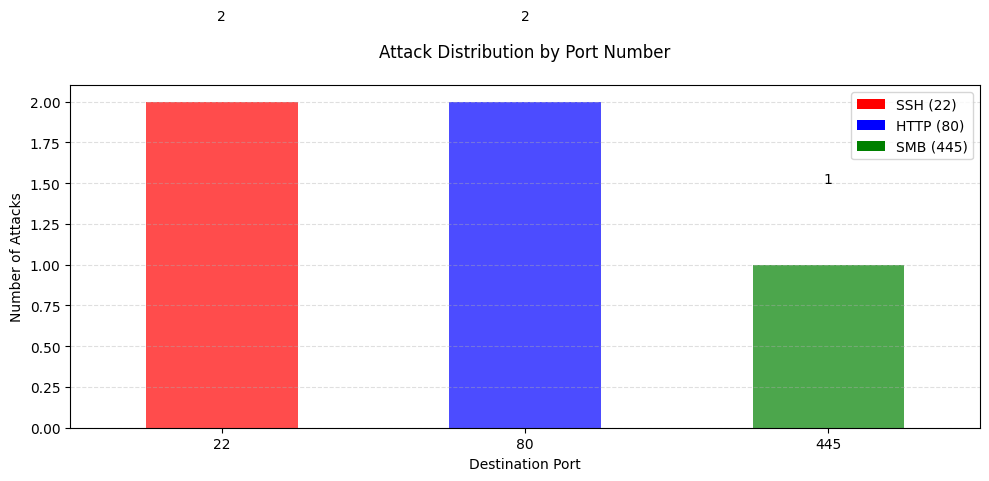


Raw log data preview:
  username  password       src_ip  dst_port
0    admin  p@ssw0rd  192.168.1.1        22
1     root    123456  192.168.1.2        80
2    guest  password  192.168.1.3        22
3     test    qwerty  192.168.1.4       445
4     user   letmein  192.168.1.5        80


In [10]:
# 1. IMPORTS (run this first)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 2. SAFE LOG VISUALIZATION FUNCTION
def visualize_attacks(log_file='attacker_logs.csv'):
    """
    Visualizes attack patterns from logs.
    Creates demo data if no log exists.
    """
    try:
        # Try loading existing log
        logs = pd.read_csv(log_file, names=['username', 'password', 'src_ip', 'dst_port'])
        print(f"Loaded {len(logs)} attacks from log")
    except FileNotFoundError:
        # Create demo data if no log exists
        print("No attack log found - creating demo data...")
        demo_attacks = {
            'username': ['admin', 'root', 'guest', 'test', 'user'],
            'password': ['p@ssw0rd', '123456', 'password', 'qwerty', 'letmein'],
            'src_ip': ['192.168.1.' + str(i) for i in range(1,6)],
            'dst_port': [22, 80, 22, 445, 80]  # SSH, HTTP, SSH, SMB, HTTP
        }
        logs = pd.DataFrame(demo_attacks)
        logs.to_csv(log_file, index=False, header=False)
        print("Created demo attack log for visualization")

    # Plot attack distribution
    plt.figure(figsize=(10,5))

    # Count attacks by port
    port_counts = logs['dst_port'].value_counts()

    # Custom colors for common ports
    color_map = {
        22: 'red',    # SSH
        80: 'blue',   # HTTP
        445: 'green'  # SMB
    }
    colors = [color_map.get(port, 'gray') for port in port_counts.index]

    # Create plot
    port_counts.plot(kind='bar', color=colors, alpha=0.7)

    # Add annotations
    for i, count in enumerate(port_counts):
        plt.text(i, count+0.5, str(count), ha='center')

    # Formatting
    plt.title("Attack Distribution by Port Number", pad=20)
    plt.xlabel("Destination Port")
    plt.ylabel("Number of Attacks")
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.4)

    # Add legend for colors
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='red', label='SSH (22)'),
        Patch(facecolor='blue', label='HTTP (80)'),
        Patch(facecolor='green', label='SMB (445)')
    ]
    plt.legend(handles=legend_elements)

    plt.tight_layout()
    plt.show()

# 3. RUN VISUALIZATION
print("📊 Generating attack visualization...")
visualize_attacks()

# 4. OPTIONAL: VIEW RAW LOG DATA
try:
    print("\nRaw log data preview:")
    print(pd.read_csv('attacker_logs.csv', names=['username', 'password', 'src_ip', 'dst_port']).head())
except:
    print("Could not display raw log data")

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


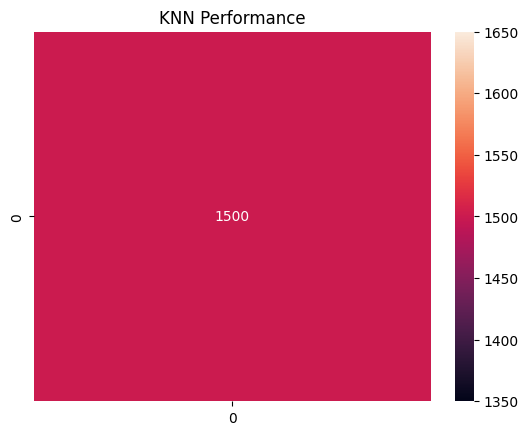

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, knn.predict(X_test)), annot=True, fmt='d')
plt.title("KNN Performance")
plt.show()

In [12]:
# Simplified hybrid logic (add to your detection script)
def hybrid_detection(packet_features):
    # KNN Prediction
    knn_pred = knn.predict([packet_features])[0]

    # Bayesian Probability (only if KNN detects attack)
    if knn_pred == 1:
        bayesian_prob = bayesian_model.query(variables=['NI'], evidence={
            'HT': packet_features['high_traffic'],
            'FL': packet_features['failed_logins']
        }).values[1]

        # Only confirm if Bayesian agrees (prob > 50%)
        return bayesian_prob > 0.5

    return False

In [14]:
import numpy as np

# Feature mapping: column indices for HT, FL, UD
feature_indices = {'HT': 0, 'FL': 1, 'UD': 2}

# Simulate predictions using Bayesian Network
def bayesian_predict(X, model):
    infer = VariableElimination(model)
    preds = []
    for x in X:
        evidence = {
            'HT': 'True' if x[feature_indices['HT']] > 0 else 'False',
            'FL': 'True' if x[feature_indices['FL']] > 0 else 'False',
            'UD': 'True' if x[feature_indices['UD']] > 0 else 'False'
        }
        try:
            result = infer.query(variables=['NI'], evidence=evidence)
            prob_attack = result.values[1]  # Probability of NI=True
            preds.append(prob_attack)
        except:
            preds.append(0.0)
    return np.array(preds)

# Get probabilities and binary predictions
y_probs = bayesian_predict(X, bn_model)
y_preds = (y_probs >= 0.5).astype(int)


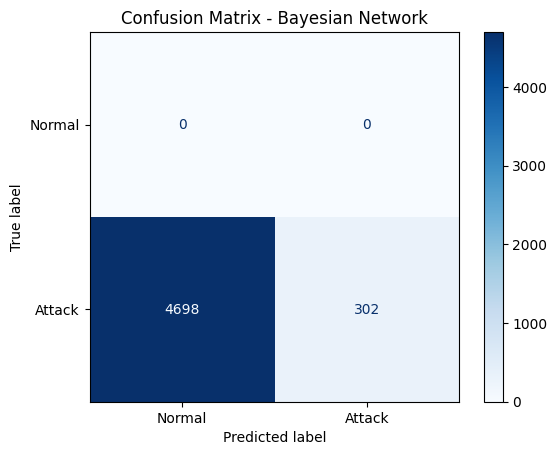

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Attack"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Bayesian Network")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1179: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


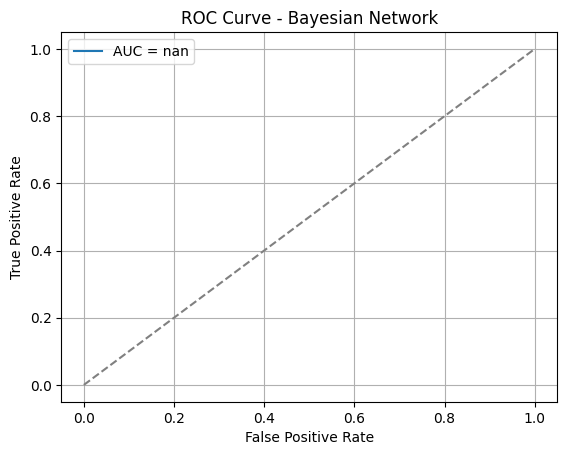

In [16]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve - Bayesian Network")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


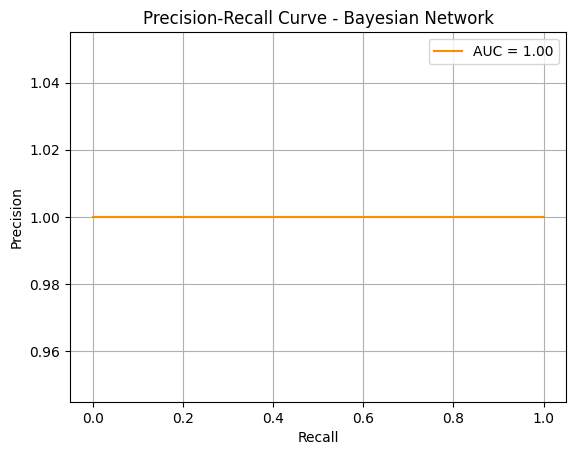

In [17]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y, y_probs)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, label=f"AUC = {pr_auc:.2f}", color='darkorange')
plt.title("Precision-Recall Curve - Bayesian Network")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()
plt.show()
